In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, plot_confusion_matrix, \
    plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:100% !important;height:100%; !important;}</style>"
HTML(style)

In [4]:
titanic = pd.read_csv(r'C:\Users\123\Desktop\DataFrames\train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [10]:
titanic.shape

(891, 9)

In [11]:
male_mean = titanic.query('Sex == "male"').query('Age >= 0').Age.mean()
male_mean

30.72664459161148

In [12]:
female_mean = titanic.query('Sex == "female"').query('Age >=0').Age.mean()
female_mean

27.915708812260537

In [13]:
titanic_male = titanic.query('Sex == "male"').fillna({'Age':male_mean})
titanic_male['Age'] = titanic_male.Age.map(int)
titanic_male.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
4,5,0,3,male,35,0,0,8.0500,S
5,6,0,3,male,30,0,0,8.4583,Q
6,7,0,1,male,54,0,0,51.8625,S
7,8,0,3,male,2,3,1,21.0750,S


In [14]:
titanic_female = titanic.query('Sex == "female"').fillna({'Age':female_mean})
titanic_female['Age'] = titanic_female.Age.map(int)
titanic_female.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
8,9,1,3,female,27,0,2,11.1333,S
9,10,1,2,female,14,1,0,30.0708,C


In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [16]:
titanic_mf = titanic_male.merge(titanic_female, how='outer')
titanic_mf.shape

(891, 9)

In [17]:
titanic_mf.sort_values('PassengerId', inplace=True)
titanic = titanic_mf

In [18]:
titanic.dropna(inplace=True)
titanic.shape

(889, 9)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
577,2,1,1,female,38,1,0,71.2833,C
578,3,1,3,female,26,0,0,7.9250,S
579,4,1,1,female,35,1,0,53.1000,S
1,5,0,3,male,35,0,0,8.0500,S


In [20]:
titanic = pd.get_dummies(titanic, drop_first=True)
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7.2500,1,0,1
577,2,1,1,38,1,0,71.2833,0,0,0
578,3,1,3,26,0,0,7.9250,0,0,1
579,4,1,1,35,1,0,53.1000,0,0,1
1,5,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
574,887,0,2,27,0,0,13.0000,1,0,1
889,888,1,1,19,0,0,30.0000,0,0,1
890,889,0,3,27,1,2,23.4500,0,0,1
575,890,1,1,26,0,0,30.0000,1,0,0


In [21]:
X = titanic.drop(['Survived', 'PassengerId'], axis=1)
y = titanic.Survived

In [22]:
clf = tree.DecisionTreeClassifier()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X.shape

(889, 8)

In [25]:
X_train.shape

(622, 8)

In [26]:
X_test.shape

(267, 8)

In [27]:
params_rdm = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1,30),
          'min_samples_split': range(1, 100),
          'min_samples_leaf': range (1, 100)}

In [28]:
rdm_clf = RandomizedSearchCV(clf, params_rdm, cv=5)

In [29]:
rdm_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(1, 100)})

In [30]:
rdm_clf.best_params_

{'min_samples_split': 74,
 'min_samples_leaf': 18,
 'max_depth': 20,
 'criterion': 'entropy'}

In [31]:
best_clf_rdm = rdm_clf.best_estimator_

In [32]:
best_clf_rdm.score(X_test, y_test)

0.8164794007490637

In [33]:
best_clf_rdm.score(X_train, y_train)

0.8167202572347267

In [34]:
y_pred_rdm = best_clf_rdm.predict(X_test)

In [35]:
recall_score(y_test, y_pred_rdm)

0.64

In [36]:
precision_score(y_test, y_pred_rdm)

0.8311688311688312

In [37]:
y_predicted_prob_rdm = best_clf_rdm.predict_proba(X_test)

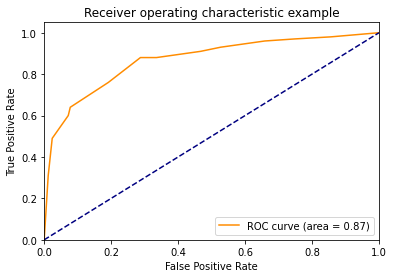

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob_rdm[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [39]:
params_grid = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1,10),
          'min_samples_split': range(2, 100, 10),
          'min_samples_leaf': range (1, 100, 10)}

In [40]:
grid_clf = GridSearchCV(clf, params_grid, cv=5)

In [41]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 100, 10),
                         'min_samples_split': range(2, 100, 10)})

In [42]:
grid_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [43]:
best_clf_grid = grid_clf.best_estimator_

In [44]:
best_clf_grid.score(X_test, y_test)

0.8202247191011236

In [45]:
y_pred_grid = best_clf_grid.predict(X_test)

In [46]:
recall_score(y_test, y_pred_grid)

0.63

In [47]:
precision_score(y_test, y_pred_grid)

0.8513513513513513

In [48]:
y_predicted_prob_grid = best_clf_grid.predict_proba(X_test)

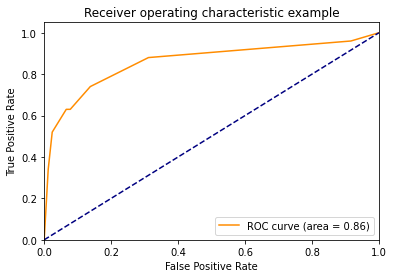

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob_grid[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
feature_importance = best_clf_grid.feature_importances_

In [51]:
feature_importance_df = pd.DataFrame({'features': list(X_train), 'feature_importance': feature_importance})

In [52]:
feature_importance_df.sort_values('feature_importance', ascending=False)

,features,feature_importance
5,Sex_male,0.470672
4,Fare,0.178755
0,Pclass,0.161086
2,SibSp,0.093603
1,Age,0.061673
7,Embarked_S,0.021517
3,Parch,0.012694
6,Embarked_Q,0.000000


In [53]:
clf_fr = RandomForestClassifier()

In [67]:
params_fr = {'n_estimators': range(1, 50), 
             'criterion': ['gini', 'entropy'],
             'max_depth': range(1,30),
             'min_samples_split': range(1, 100),
             'min_samples_leaf': range (1, 100)}

In [68]:
rdm_clf_fr = RandomizedSearchCV(clf_fr, params_fr, cv=5)

In [69]:
rdm_clf_fr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(1, 100),
                                        'n_estimators': range(1, 50)})

In [70]:
rdm_clf_fr.best_params_

{'n_estimators': 19,
 'min_samples_split': 45,
 'min_samples_leaf': 17,
 'max_depth': 29,
 'criterion': 'entropy'}

In [71]:
rdm_clf_fr_best = rdm_clf_fr.best_estimator_

In [72]:
rdm_clf_fr_best.score(X_test, y_test)

0.8014981273408239

In [73]:
y_pred_fr = rdm_clf_fr_best.predict(X_test)

In [74]:
recall_score(y_test, y_pred_fr)

0.62

In [75]:
precision_score(y_test, y_pred_fr)

0.8051948051948052

In [76]:
y_predicted_prob_fr = rdm_clf_fr_best.predict_proba(X_test)

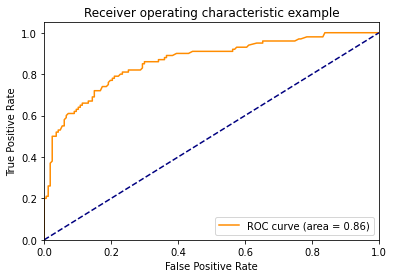

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob_fr[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [78]:
feature_importance_rf = rdm_clf_fr_best.feature_importances_

In [82]:
feature_importance_rf_df = pd.DataFrame({'features': list(X_train), 'feature_importance': feature_importance})
feature_importance_rf_df.sort_values('feature_importance', ascending=False)

,features,feature_importance
5,Sex_male,0.470672
4,Fare,0.178755
0,Pclass,0.161086
2,SibSp,0.093603
1,Age,0.061673
7,Embarked_S,0.021517
3,Parch,0.012694
6,Embarked_Q,0.000000
